In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
x_data = np.linspace(0.0,10.0,1000000)

In [4]:
noise = np.random.randn(len(x_data))

y = mx + b
b = 5 

In [5]:
y_true = (0.5 * x_data) + 5 + noise

In [6]:
x_df=pd.DataFrame(data=x_data,columns=['X data'])
y_df = pd.DataFrame(data=y_true,columns=['Y'])
my_data = pd.concat([x_df,y_df],axis=1)

In [7]:
my_data

,X data,Y
0,0.00000,4.896555
1,0.00001,4.494780
2,0.00002,6.109520
3,0.00003,6.002798
4,0.00004,4.188266
5,0.00005,6.362947
6,0.00006,4.332419
7,0.00007,5.795247
8,0.00008,5.713410
9,0.00009,5.072841


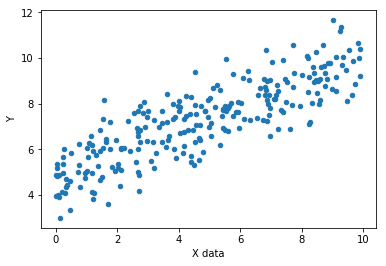

In [8]:
my_data.sample(n=250).plot(kind='scatter',x='X data',y='Y')

In [9]:
batch_size = 20

In [10]:
m = tf.Variable(0.8)
b = tf.Variable(0.17)

In [11]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [12]:
y_model = m * xph + b

In [13]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [14]:
optimizer =tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [15]:
init = tf.global_variables_initializer()

In [16]:
with tf.Session() as sess:
    sess.run(init)
    batches = 10000
    
    for i in range(batches):
        rand_index = np.random.randint(len(x_data),size=batch_size)
        feed = {xph: x_data[rand_index],yph:y_true[rand_index]}
        sess.run(train,feed_dict = feed)
    model_m, model_b = sess.run([m,b])

In [17]:
model_m

0.4824499

In [18]:
model_b

4.990898

In [19]:
y_hat= x_data *model_m + model_b

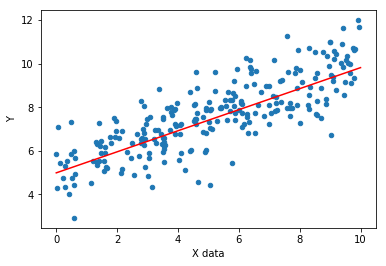

In [22]:
my_data.sample(250).plot(kind='scatter',x='X data',y='Y')
plt.plot(x_data,y_hat,'r')